Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\mahes\anaconda3\Lib\tkinter\__init__.py", line 1968, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\mahes\AppData\Local\Temp\ipykernel_17096\191005786.py", line 54, in check
    if bayes.predict(count_vect.transform([msg]))==[1]:
       ^^^^^
NameError: name 'bayes' is not defined. Did you mean: 'bytes'?
Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\mahes\anaconda3\Lib\tkinter\__init__.py", line 1968, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\mahes\AppData\Local\Temp\ipykernel_17096\191005786.py", line 45, in compare
    accuracy=[acc_naive,acc_svm,acc_knn]
                                ^^^^^^^
NameError: name 'acc_knn' is not defined


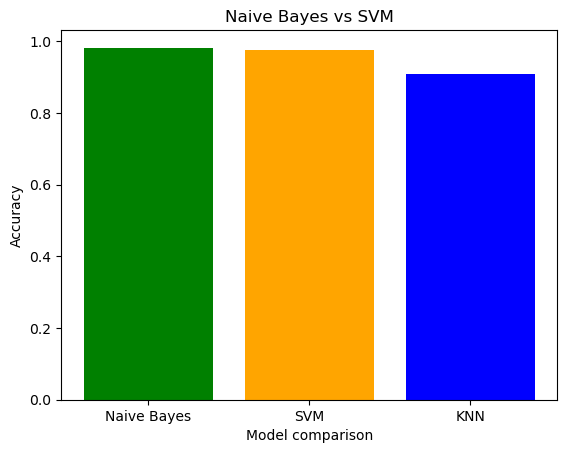

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn import feature_extraction
from sklearn import model_selection
from sklearn import naive_bayes, metrics, svm
###############################################
data = pd.read_csv(r'C:\Users\mahes\spam\spam cv.csv', encoding='latin1')
data=data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1)
from sklearn.feature_extraction.text import CountVectorizer
count_vect=CountVectorizer(stop_words = 'english')
X=count_vect.fit_transform(data['v2'])
data["v1"]=data["v1"].map({'spam':1,'ham':0})

###########################################
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, data['v1'], test_size=0.33, random_state=40)

from tkinter import *
import tkinter.messagebox as m
w=Tk()
w.title("spam sms classification")
def naive():
    global acc_naive
    global bayes
    bayes = naive_bayes.MultinomialNB()
    bayes.fit(X_train, Y_train)
    Y_pred=bayes.predict(X_test)
    from sklearn.metrics import accuracy_score
    acc_naive=accuracy_score(Y_test,Y_pred)
    m.showinfo(title="Naive Bayes",message='accuracy is'+str(round(acc_naive*100,2)))
def svm():
    global acc_svm
    from sklearn.svm import SVC
    svm=SVC(gamma='scale')
    svm.fit(X_train, Y_train)
    Y_pred_svm=svm.predict(X_test)
    from sklearn.metrics import accuracy_score
    acc_svm=accuracy_score(Y_test,Y_pred_svm)
    m.showinfo(title="Naive Bayes",message='accuracy is'+str(round(acc_svm*100,2)))
def compare():
    import matplotlib.pyplot as plt
    clf=['Naive Bayes','SVM','KNN']
    accuracy=[acc_naive,acc_svm,acc_knn]
    plt.bar(clf,accuracy,color=['green','orange','blue'])
    plt.xlabel("Model comparison")
    plt.ylabel("Accuracy")
    plt.title("Naive Bayes vs SVM")
    plt.show()
    
def check():
    msg=v.get()
    if bayes.predict(count_vect.transform([msg]))==[1]:
        m.showinfo(title="spam or ham",message="This message is spam")
    else:
        m.showinfo(title="spam or ham",message="This message is not spam")
def knn():
    from sklearn.neighbors import KNeighborsClassifier
    global acc_knn
    global K
    K = KNeighborsClassifier(n_neighbors=5)
    K.fit(X_train, Y_train)
    Y_pred=K.predict(X_test)
    from sklearn.metrics import accuracy_score
    acc_knn=accuracy_score(Y_test,Y_pred)
    m.showinfo(title="KNN",message='accuracy is'+str(round(acc_knn*100,2)))
def reset():
    v.set("")
    
v=StringVar()
L=Label(w,text="SPAM MESSAGE CLASSIFICATION",font=('arial',20,'bold'),bg='cyan',fg='red')
B1=Button(w,relief='solid',text="Naive Bayes",font=('arial',20,'bold'),command=naive)
B2=Button(w,relief='solid',text="svm",font=('arial',20,'bold'),command=svm)
B3=Button(w,relief='solid',text="Compare",font=('arial',20,'bold'),command=compare)
E=Entry(w,bg='yellow',bd=10,font=('arial',20,'bold'),textvariable=v)
B4=Button(w,relief='solid',text="spam or ham",font=('arial',20,'bold'),command=check)
B5=Button(w,relief='solid',text="Reset",font=('arial',20,'bold'),command=reset)
B6=Button(w,relief='solid',text="knn",font=('arial',20,'bold'),command=knn)
L.grid(row=1,column=1,columnspan=4)
B1.grid(row=2,column=1)
B2.grid(row=2,column=2)
B3.grid(row=2,column=3)
E.grid(row=3,column=1,columnspan=4)
B4.grid(row=4,column=1,columnspan=2)
B5.grid(row=4,column=3,columnspan=2)
B6.grid(row=5,column=2)
###########################

w.mainloop()
